# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



# Student Answers Below

# Loading the data

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


In [27]:
# Setting up the columns and the Groupings 
for c in ["person_gender","person_education","person_home_ownership",
          "loan_intent","previous_loan_defaults_on_file"]:
    if c in df.columns:
        df[c] = df[c].astype("category")

age_groups = [18, 25, 35, 45, 55, 65, 80]
age_labels = ["18-24","25-34","35-44","45-54","55-64","65+"]
df["age_groups"] = pd.cut(df["person_age"], bins=age_groups, labels=age_labels, right=False)
features = ["person_income","loan_amnt","loan_int_rate","credit_score","loan_percent_income"]



# BoxPlots to compare by Gender!
We will compare spread medians and outliers 

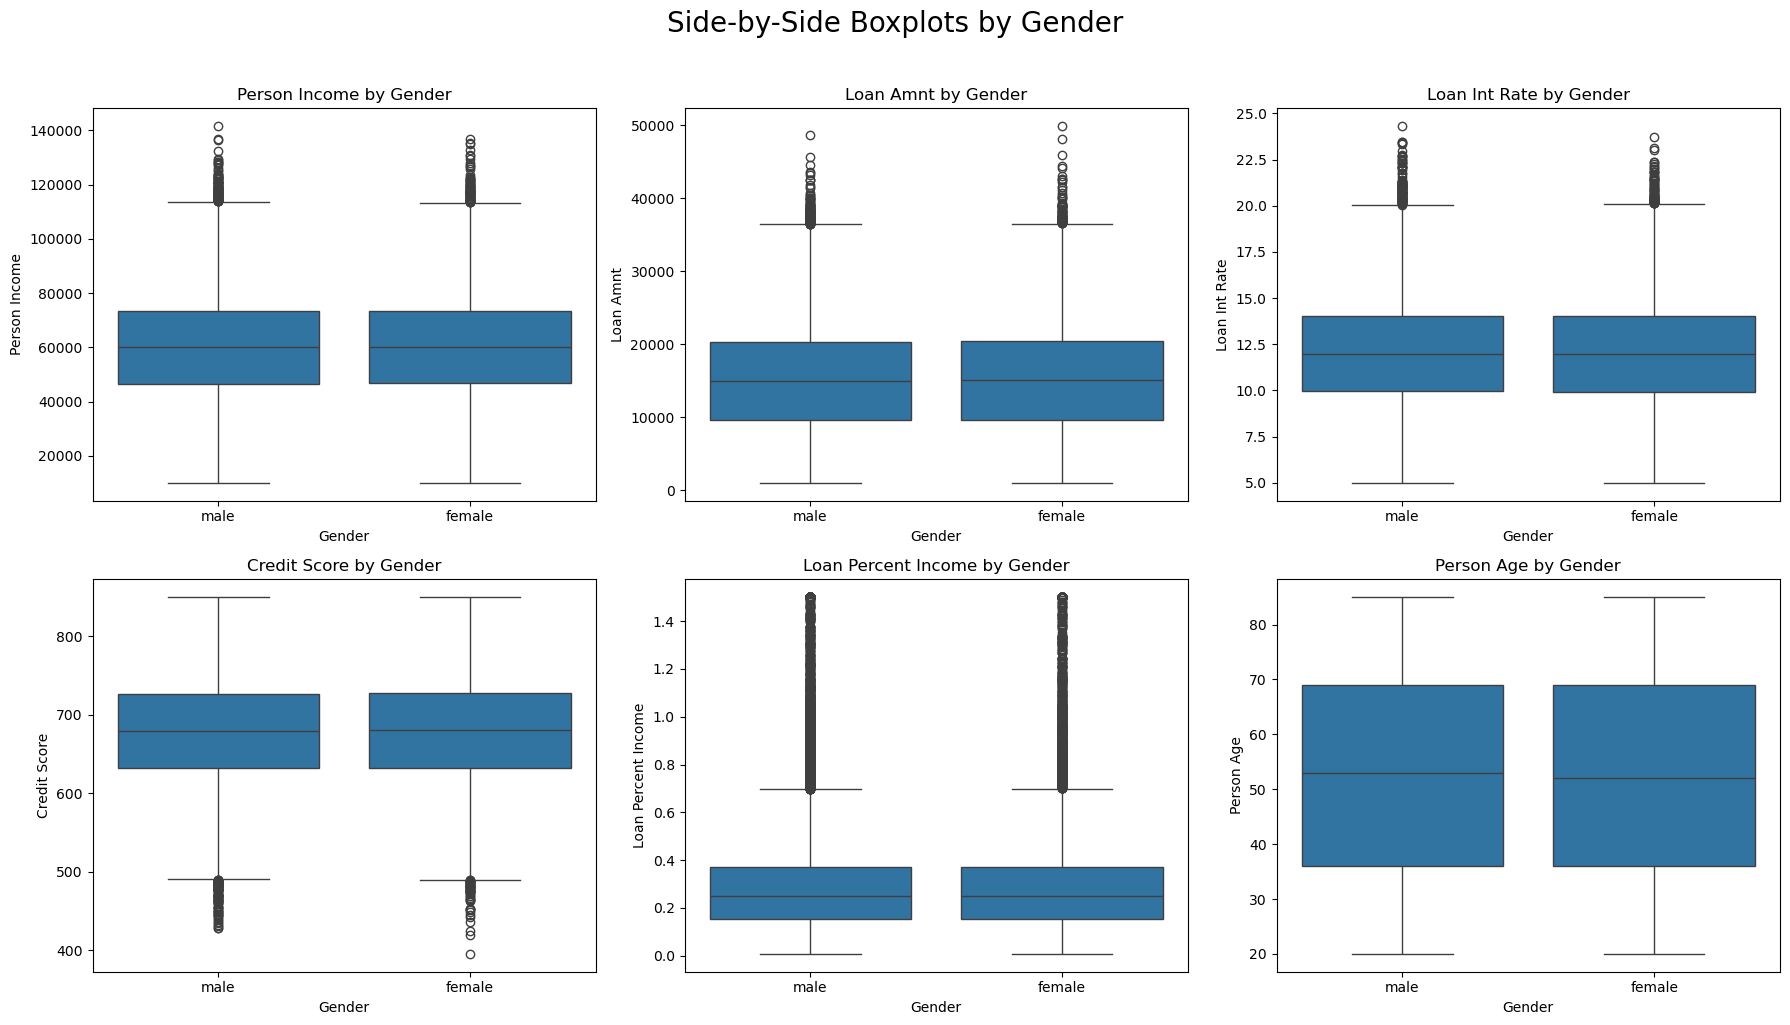

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for ax, col in zip(axes, features + ["person_age"]):
    sns.boxplot(data=df, x="person_gender", y=col, ax=ax)
    ax.set_xlabel("Gender")
    ax.set_ylabel(col.replace("_"," ").title())
    ax.set_title(f"{col.replace('_',' ').title()} by Gender")
fig.suptitle("Side-by-Side Boxplots by Gender", y=1.02, fontsize=20)
plt.tight_layout()
plt.show()


# Histograms by Gender
This will check distibution inside each grouping 

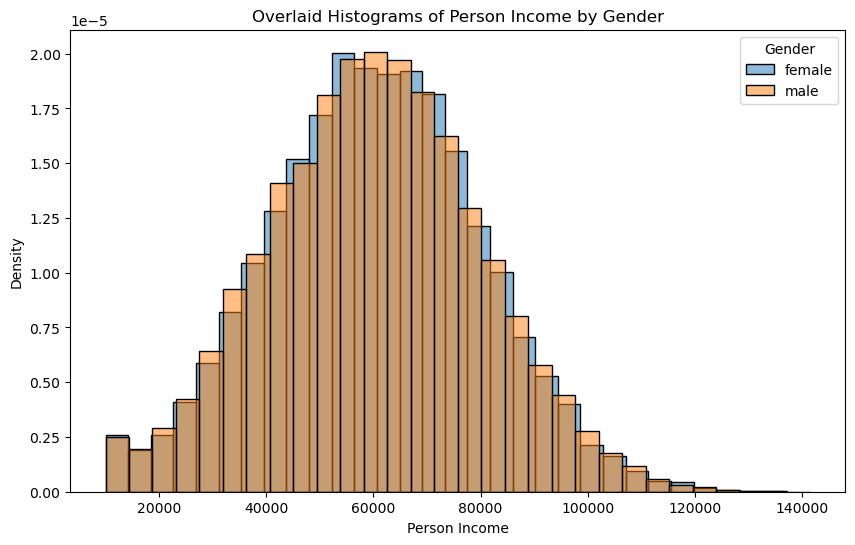

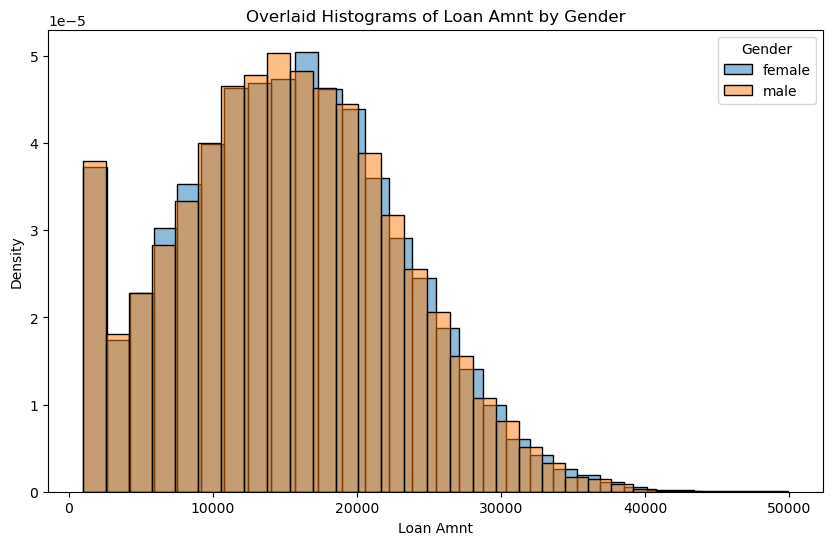

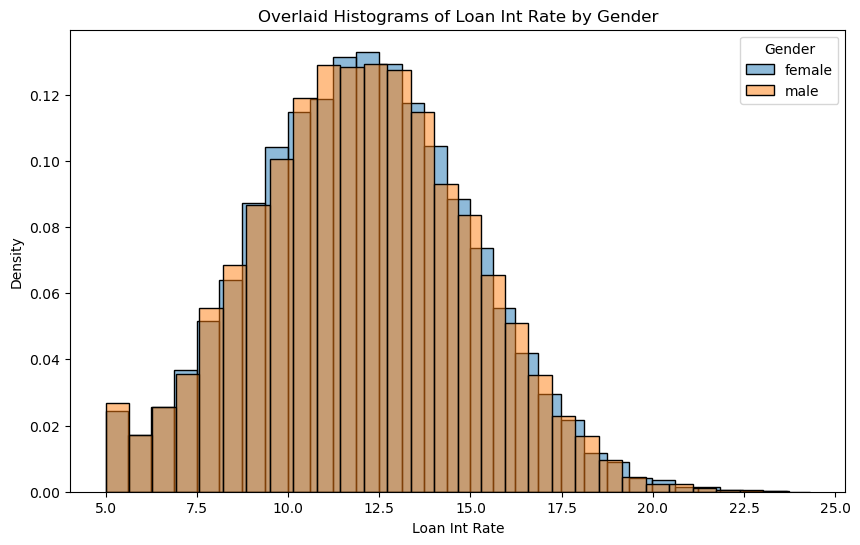

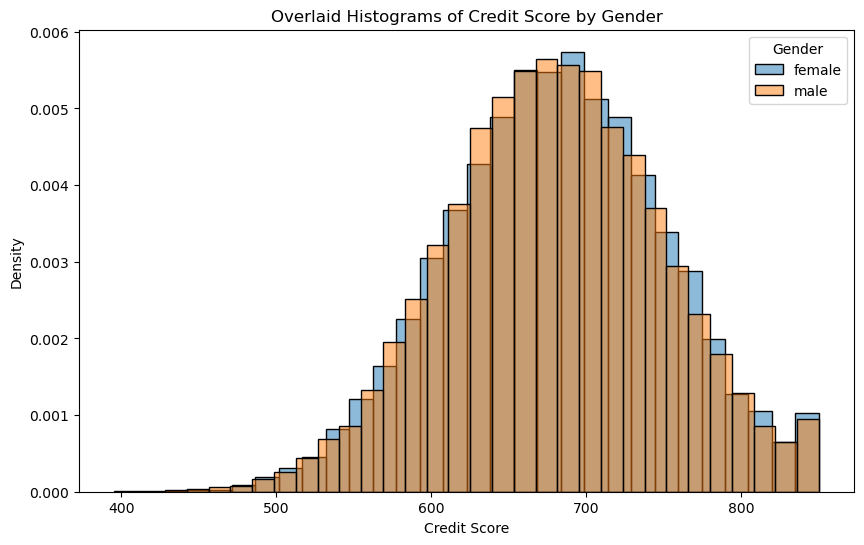

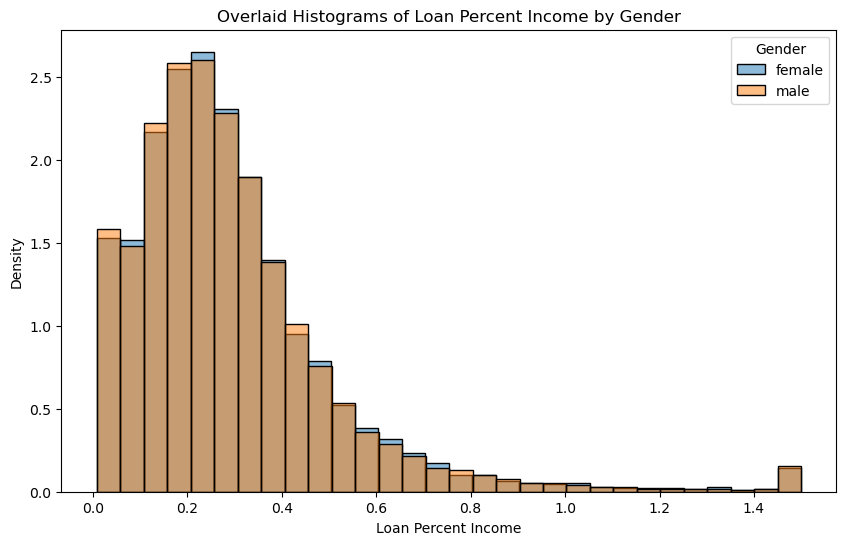

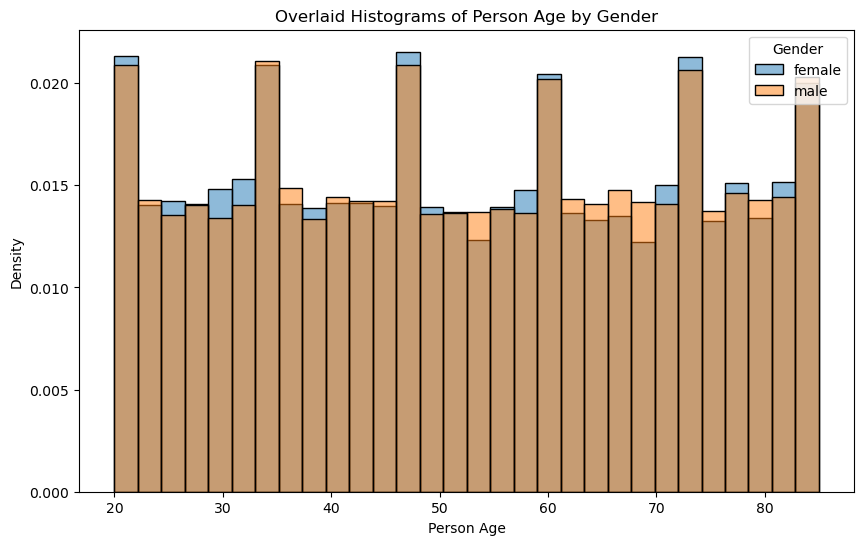

In [14]:
def overlay_hist(col, bins=30):
    plt.figure(figsize=(10,6))
    for g, sub in df.groupby("person_gender"):
        sns.histplot(sub[col], bins=bins, stat="density", kde=False, label=str(g), alpha=0.5)
    plt.xlabel(col.replace("_"," ").title())
    plt.ylabel("Density")
    plt.title(f"Overlaid Histograms of {col.replace('_',' ').title()} by Gender")
    plt.legend(title="Gender")
    plt.show()

for col in features + ["person_age"]:
    overlay_hist(col)


# Credit Score By Gender

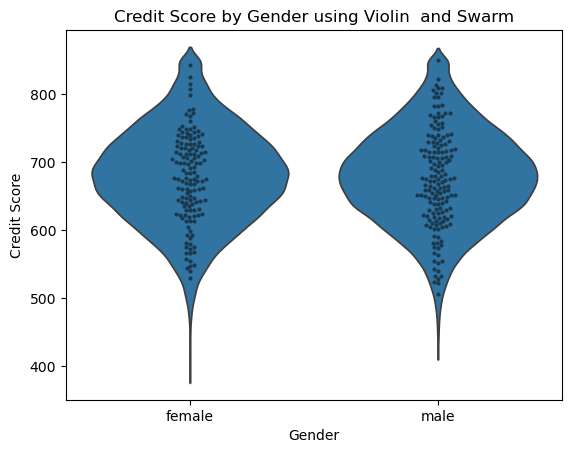

In [44]:
ax = sns.violinplot(data=df, x="person_gender", y="credit_score", inner=None)
sns.swarmplot(
    data=df.sample(min(len(df), 300), random_state=1),
    x="person_gender", y="credit_score",
    size=3, color="k", alpha=0.5
)
ax.set_xlabel("Gender")
ax.set_ylabel("Credit Score")
ax.set_title("Credit Score by Gender using Violin  and Swarm")
plt.show()


# Credit Score By Loan Status

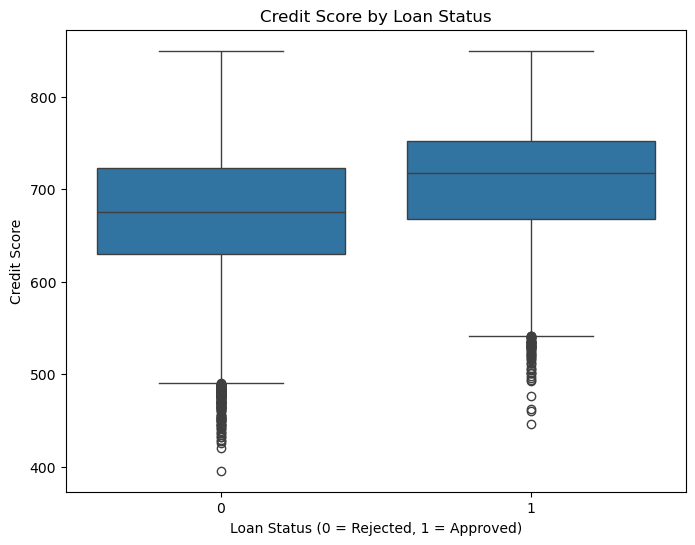

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="loan_status", y="credit_score")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Credit Score")
plt.title("Credit Score by Loan Status")
plt.show()


# Loan Percent of Income by Loan Status

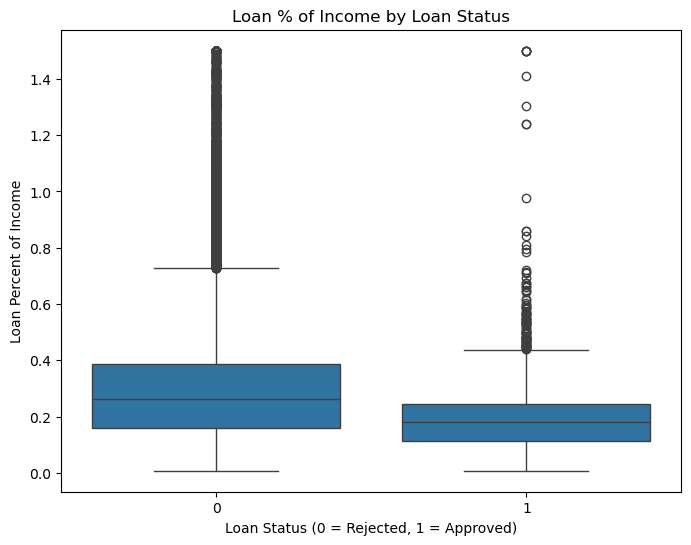

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="loan_status", y="loan_percent_income")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Loan Percent of Income")
plt.title("Loan % of Income by Loan Status")
plt.show()


# Income by Loan Status

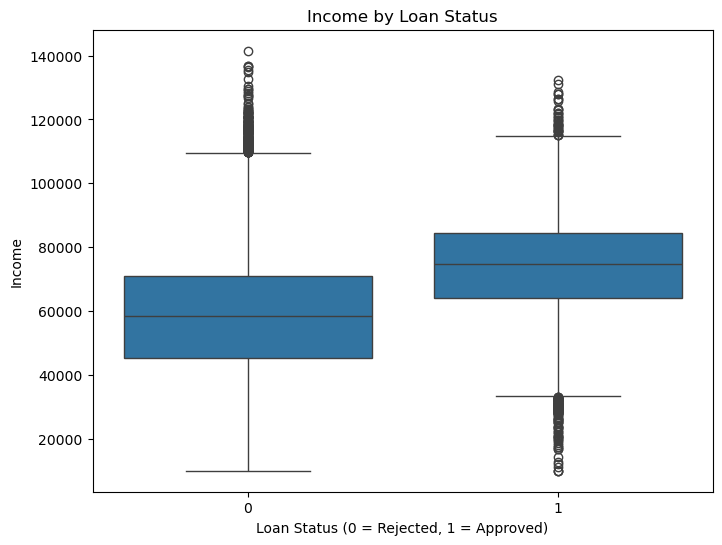

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="loan_status", y="person_income")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Income")
plt.title("Income by Loan Status")
plt.show()


# Loan Amount by Loan Status

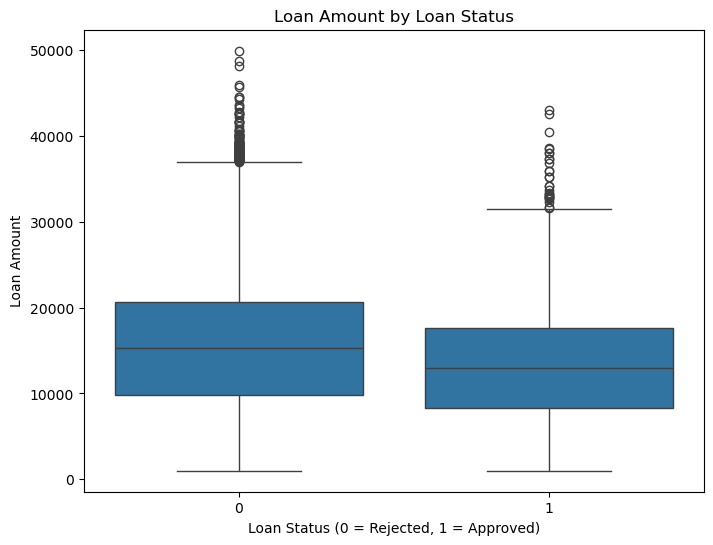

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="loan_status", y="loan_amnt")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Loan Status")
plt.show()


# Loan Interest Rate by Loan Status

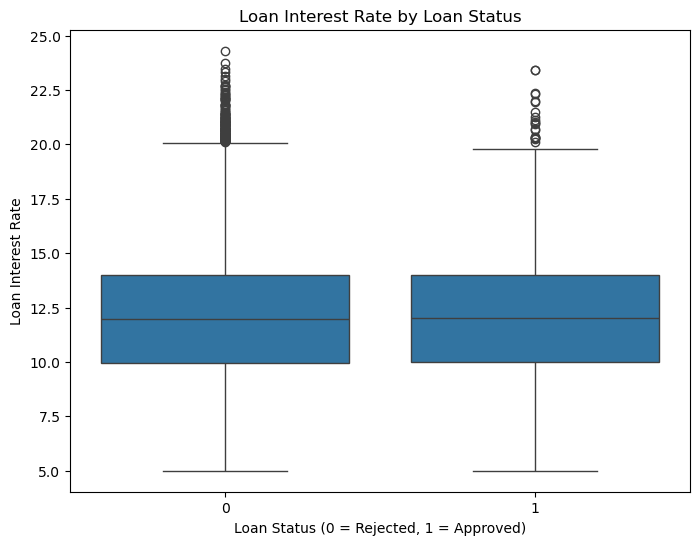

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="loan_status", y="loan_int_rate")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Loan Interest Rate")
plt.title("Loan Interest Rate by Loan Status")
plt.show()


# Age by Loan Status

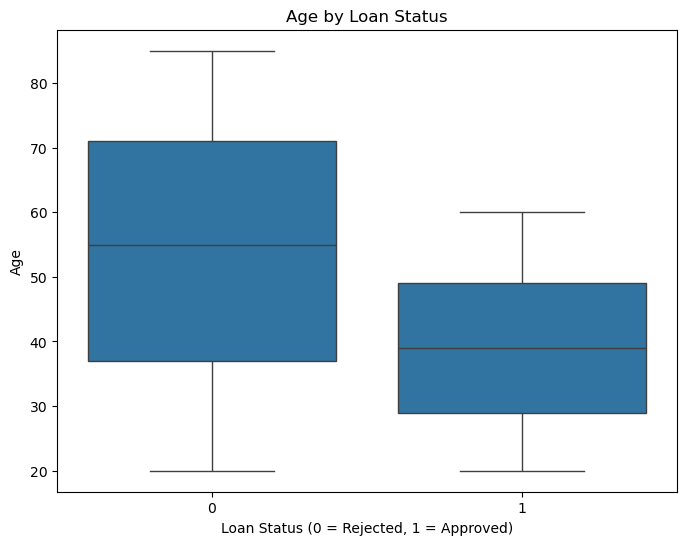

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="loan_status", y="person_age")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Age")
plt.title("Age by Loan Status")
plt.show()


# And compare how age and gender affects each feature 

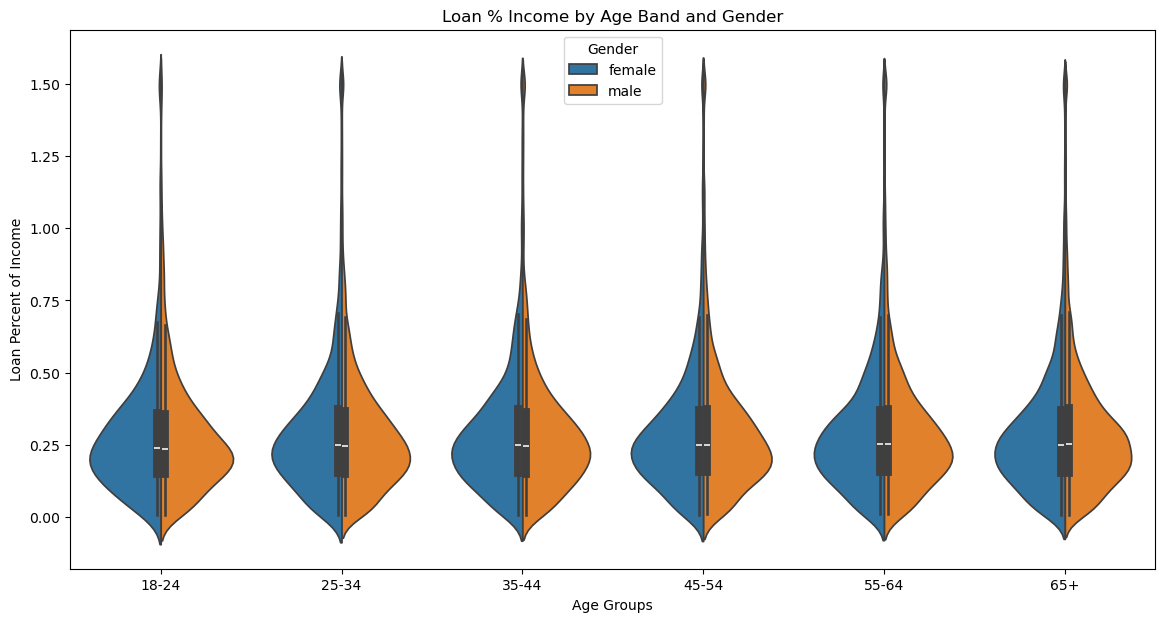

In [30]:
df_plot = df.dropna(subset=["age_groups","loan_percent_income","person_gender"]).copy()

# if >2 gender levels exist, keep first two so split=True works
if df_plot["person_gender"].nunique() > 2:
    keep = df_plot["person_gender"].cat.categories[:2]
    df_plot = df_plot[df_plot["person_gender"].isin(keep)]

plt.figure(figsize=(14,7))
sns.violinplot(
    data=df_plot,
    x="age_groups", y="loan_percent_income",
    hue="person_gender", split=True
)
plt.xlabel("Age Groups")
plt.ylabel("Loan Percent of Income")
plt.title("Loan % Income by Age Band and Gender")
plt.legend(title="Gender")
plt.show()


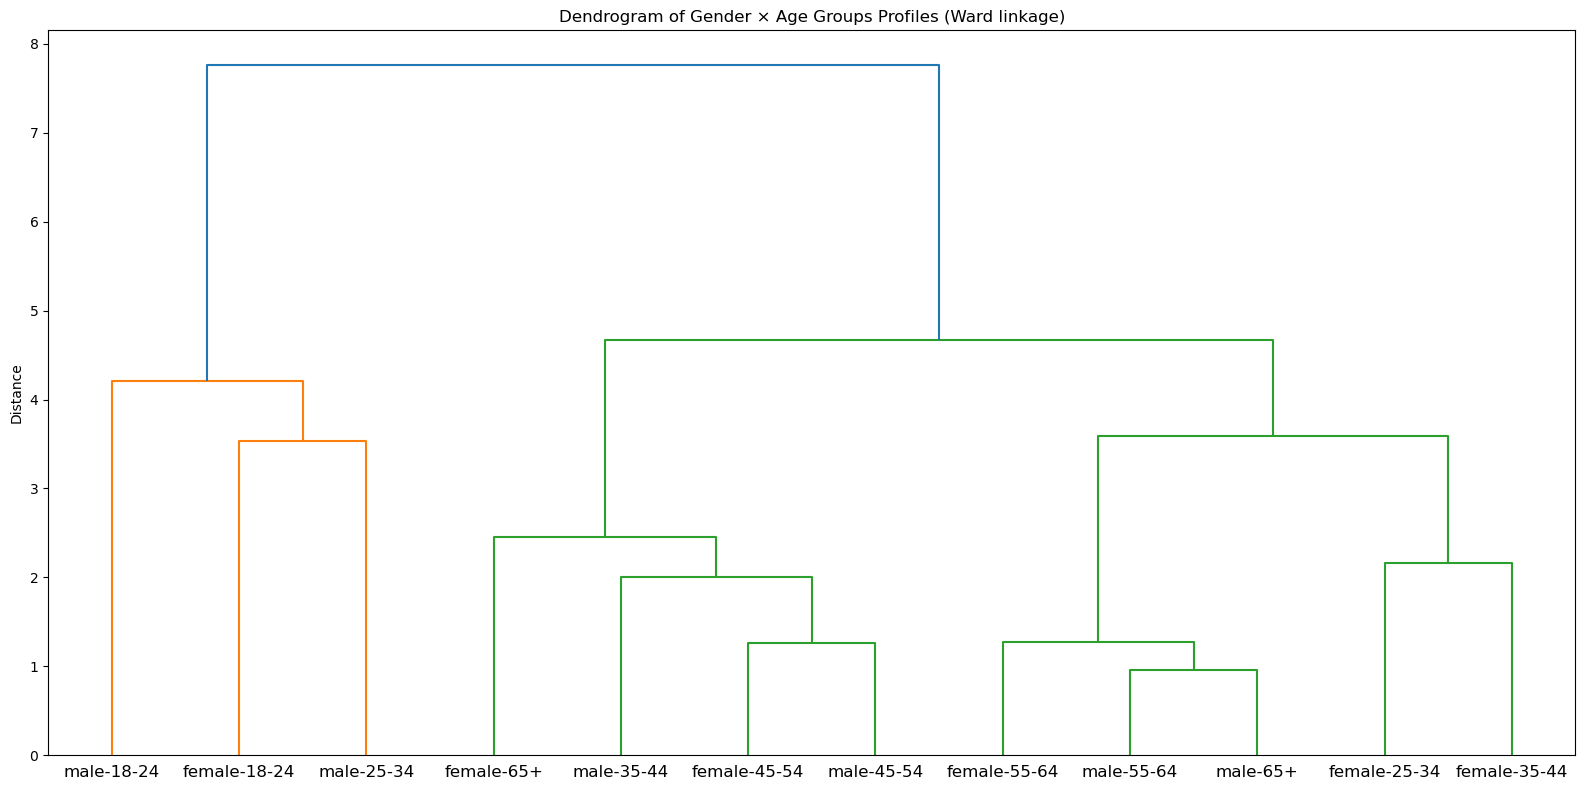

In [36]:
group_cols = ["person_gender","age_groups"]
num_cols   = ["person_income","loan_amnt","loan_int_rate",
              "credit_score","loan_percent_income","person_age"]

# group means; observed=True avoids the FutureWarning
grouped = (
    df.dropna(subset=["age_groups"])
      .groupby(group_cols, observed=True)[num_cols]
      .mean()
)

# standardize and cluster (Ward linkage)
scaler = StandardScaler()
X = scaler.fit_transform(grouped.values)

Z = linkage(X, method="ward")
plt.figure(figsize=(16,8))
dendrogram(Z, labels=[f"{g}-{a}" for g, a in grouped.index], leaf_rotation=0)
plt.title("Dendrogram of Gender × Age Groups Profiles (Ward linkage)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


# Summary of results

BoxPlots:

- Income, loan amount, interest rate, credit score, loan percent of income, and age do not appear to be very different across genders. This would suggest that there are no differences by gender. (Evidence 1)

- Medians and interquartile ranges are nearly the same, and both genders show high incomes and large loan amounts with basically the same outliers on both sides. (Evidence 2)

When comparing approved vs. rejected loans, however, credit score and loan percent of income show clearer separation: approved applicants tend to have higher credit scores and lower loan-to-income ratios, while income, loan amount, interest rate, and age remain very similar regardless of approval. (Evidence 3)

Histograms:

- Person income is bell-shaped, centered at about 60k for both genders, almost the same. (Evidence 4)

- Loan amounts are mostly small loans with a few very large ones, and distributions overlap greatly between genders. (Evidence 5)

- Loan interest rate is unimodal around 12–13%, which is the same for both genders. (Evidence 6)

- Credit score peaks between 650–700 for both groups and shapes almost match. (Evidence 7)

- Loan percent of income is usually under 40% and shows much overlap between genders, but when split by loan_status, approved applicants cluster more at the lower end, while rejected applicants extend higher. (Evidence 8)

- Age is evenly spread across the full range regardless of gender. (Evidence 9)

General Summary: 

Gender differences are minor. This suggests that gender is not strongly driving differences in these features, and this can be provided to the court as valuable evidence of fairness.

The major decision makers of loan approval are credit score and loan percent of income, which show clear separation when plotted against loan_status.

Features such as income, loan amount, interest rate, and age appear less related to approval outcomes because their distributions overlap heavily between approved and rejected applicants.

Since male and female distributions overlap almost completely, there is no evidence of gender discrimination from the data given. However including age in a credit might not be the best legal modal. 

